# Sprawozdanie Metody Rozpoznawania Obrazów
## Laboratorium 1 - Metoda najbliższych sąsiadów
### Wykonanie Patryk Sładek
Celem ćwiczenia było praktyczne zapoznanie się z podstawowymi pojęciami metod rozpoznawania wzorców

**Ćw.1** 1-NN z wykorzystaniem odległości euklidesowej

W pierwszej kolejności wczytywanie danych faces.mat

In [5]:
from scipy import io as io

def load_faces():
    mat = io.loadmat('facesYale.mat')
    x_train = mat['featuresTrain']
    x_test = mat['featuresTest']
    y_train = mat['personTrain'].flatten()
    y_test = mat['personTest'].flatten()
    return x_train, x_test, y_train, y_test

In [6]:
print(load_faces())

(array([[ -0.77371144,  19.9983068 ,   0.95785986, ...,  -3.97787759,
         -2.68089837,  -4.25937776],
       [-14.12646837,  23.49895937, -10.89247733, ...,  -3.24038105,
          1.6076363 ,  -3.33658038],
       [-11.3737303 ,  23.60965637, -10.30463164, ...,   0.82072538,
          0.57232635,  -6.42296503],
       ..., 
       [ 11.00457429,   6.40854313, -17.35040606, ...,   6.57904718,
         -3.21790972,   4.43741055],
       [ 12.54996194,   4.69693765, -15.35905122, ...,   5.25819668,
         -1.88203268,   5.29519726],
       [ 12.38473047,   2.78462084, -10.74272667, ...,   3.72925626,
         -4.10522748,   1.93011487]]), array([[ -1.70052026e+01,   2.09078338e+01,  -6.19435900e+00,
         -7.07703409e+00,  -7.10808068e+00,  -2.79464552e-01,
         -2.39200968e+00,  -4.78293036e+00,   8.18532178e+00,
         -7.85746944e+00],
       [ -1.06233197e+01,   2.65566297e+01,  -8.24444830e+00,
          1.23629320e+00,  -5.30178776e+00,  -1.74560935e+00,
         -4

Następnie definujemy metrykę euklidesową

In [ ]:
def euclides(matrix, vector):
    return np.sqrt(np.sum((matrix - vector) ** 2, axis=1))

Oraz funkcję pomocniczą do skalowania macierzy

In [ ]:
def scale(data, scale_factor):
    x_train, x_test, y_train, y_test = data
    x_train = x_train.copy()
    x_test = x_test.copy()
    x_train[:,-1] *= scale_factor
    x_test[:,-1] *= scale_factor
    return x_train, x_test, y_train, y_test

W głównej części programu definujemy metody do obliczania predykcji na podstawie zadanej metryki

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score
import metrics

def predict(data):
    x_train, x_test, y_train, y_test = data
    return np.array([predict_specific(x_elem, x_train, y_train, metrics.euclides) for x_elem in x_test])


def predict_specific(x_test_element, x_train, y_train, metric):
    distance = metric(x_train, x_test_element)
    nearest = np.argmin(distance)
    return y_train[nearest]

def prediction_error(prediction, y_test):
    return 1 - accuracy_score(y_test, prediction)




For scale: 1 error is: 0.0666666666667
For scale: 2 error is: 0.1
For scale: 3 error is: 0.1
For scale: 4 error is: 0.1
For scale: 5 error is: 0.133333333333
For scale: 6 error is: 0.133333333333
For scale: 7 error is: 0.133333333333
For scale: 8 error is: 0.133333333333
For scale: 9 error is: 0.166666666667
For scale: 10 error is: 0.166666666667
For scale: 11 error is: 0.166666666667
For scale: 12 error is: 0.166666666667
For scale: 13 error is: 0.166666666667
For scale: 14 error is: 0.166666666667
For scale: 15 error is: 0.166666666667
For scale: 16 error is: 0.166666666667
For scale: 17 error is: 0.2
For scale: 18 error is: 0.233333333333
For scale: 19 error is: 0.233333333333
For scale: 20 error is: 0.266666666667


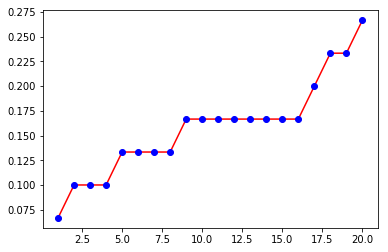

In [29]:
    from matplotlib import pyplot
    import scaler
    data = load_faces()
    alpha_range = range(1, 21)
    alpha_errors = []
    for alpha in alpha_range:
        scaled_data = scaler.scale(data, alpha)
        prediction = predict(scaled_data)
        error = prediction_error(prediction, y_test)
        alpha_errors.append(error)
        print("For scale: " + str(alpha) + " error is: " + str(error))
    pyplot.plot(alpha_range, alpha_errors, 'r-')
    pyplot.plot(alpha_range, alpha_errors, 'bo')
    pyplot.show()

Z powyższych obliczeń wynika, że przeskalowanie ostatniej cechy spowodowało wzrost błędu predykcji. Warto zauważyć 
,że przeskalowanie ostatniej cechy nie wpływa liniowo na zmianę błędu. Widać na wykresie charakterystyczne "schodki".

Kolejnym zadaniem było sprawdzenie błędu klasyfikacji dla danych z pliku spambase.ma

In [31]:
import loader
spam_data = loader.load_spam()
x_train, x_test, y_train, y_test = spam_data
# Computed results
predicted_data = predict(spam_data)
# Check accuracy of prediction
prediction_accuracy = accuracy_score(y_test, predicted_data)
print("Error of spam prediction: " + str(1 - prediction_accuracy))

Error of spam prediction: 0.17905021586


Poniższy kod łączy zbiory testowe i treningowe i przeprowadza na nich 5-fold cross validation

In [40]:
from sklearn.model_selection import KFold
def cross_validate_specific(x, y, folds_number):
    rkf = KFold(n_splits=folds_number, shuffle=True)
    error_rates = []
    for train, test in rkf.split(x, y):
        data = x[train], x[test], y[train], y[test]
        prediction = predict(data)
        error = prediction_error(prediction, y[test])
        error_rates.append(error)
    mean_error = np.array(error_rates).mean()
    return mean_error


def cross_validate(data, folds=5, repeats=10):
    x_train, x_test, y_train, y_test = data
    # Concat test and train data
    x = np.vstack((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    for i in range(10):
        print("{i}. Cross validation test error {error}".format(i=i + 1, error=cross_validate_specific(x, y, 5)))

cross_validate(spam_data)

1. Cross validation test error 0.08628640891280744
2. Cross validation test error 0.0873717131662182
3. Cross validation test error 0.08976278147571168
4. Cross validation test error 0.08563140253977249
5. Cross validation test error 0.08759028466222915
6. Cross validation test error 0.0915002596421659
7. Cross validation test error 0.0847670301656989
8. Cross validation test error 0.08976348959070954
9. Cross validation test error 0.08389392437331825
10. Cross validation test error 0.08911273190766181


Wyniki błędów są niższe od błędów pierwotnej predykcji

**Ćw.2** 1-NN w wielu wymiarach

Błąd klasyfikacji metody 1-NN dla serii problemów klasyfikacyjnych w zależności od wymiarowości przestrzeni (liczby cech i)


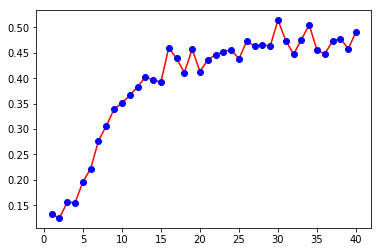

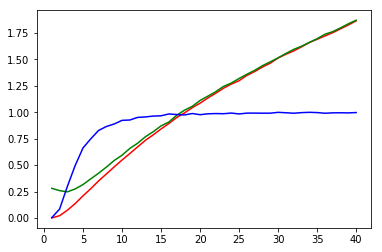

In [1]:
    from hypercubes import compute_error_rates,compute_distance_rates
    import loader
    data, max_dimensions = loader.load_hypercubes()
    compute_error_rates(data, max_dimensions)
    compute_distance_rates(data, max_dimensions)

Z pierwszego wykresu można wywnioskować, że błąd klasyfikacji wzrasta wraz z powiększaniem się